In [62]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, root_mean_squared_error

import matplotlib.pyplot as plt

In [63]:
# BASE
from sklearn.datasets import make_regression

X, y = make_regression(
    n_samples=1000, n_features=1,
    bias=10, noise=5,
    random_state=42
)

feature_df = pd.DataFrame(X, columns=['feature'])
target_df = pd.DataFrame(y, columns=['target'])

df = pd.concat([
    feature_df, target_df
], axis=1)

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [64]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [65]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [66]:
train_r2_score = r2_score(y_train, y_train_pred)
train_rmse = root_mean_squared_error(y_train, y_train_pred)

test_r2_score = r2_score(y_test, y_test_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

In [67]:
result_df = pd.DataFrame(
    [
        [train_r2_score, train_rmse],
        [test_r2_score, test_rmse]
    ],
    columns=['r2_score', 'rmse'],
    index=['train', 'test']
)
result_df

,r2_score,rmse
train,0.909700,5.026829
test,0.936169,4.631266


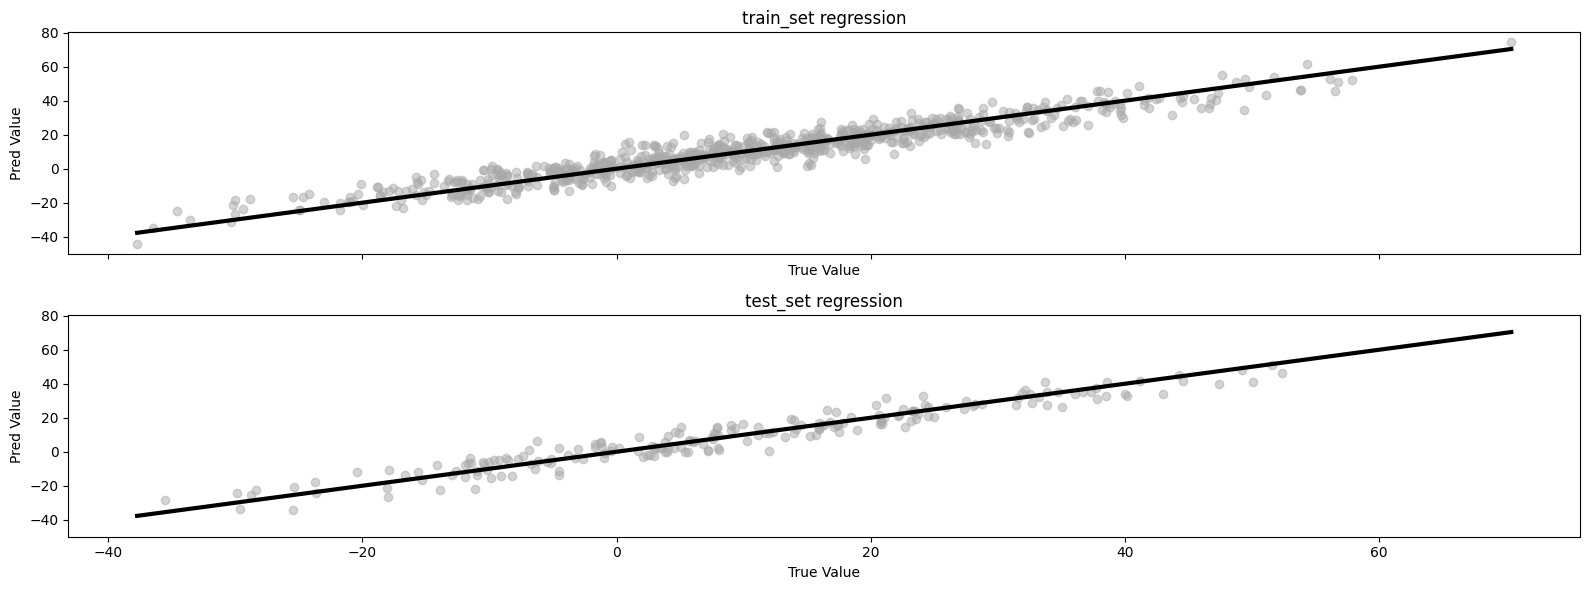

In [128]:
fig, axes = plt.subplots(2, 1, figsize=(16, 6), sharex=True, sharey=True)

ax = axes[0]
ax.scatter(y_train, lr.predict(X_train), alpha=0.5, color='darkgray')
ax.plot(np.linspace(min(y), max(y), 10), np.linspace(min(y), max(y), 10), color='k', linewidth=3)
ax.set_title('train_set regression')
ax.set_xlabel('True Value')
ax.set_ylabel('Pred Value')

ax = axes[1]
ax.scatter(y_test, lr.predict(X_test), alpha=0.5, color='darkgray')
ax.plot(np.linspace(min(y), max(y), 10), np.linspace(min(y), max(y), 10), color='k', linewidth=3)
ax.set_xlabel('True Value')
ax.set_ylabel('Pred Value')
ax.set_title('test_set regression')
plt.tight_layout()
plt.show()

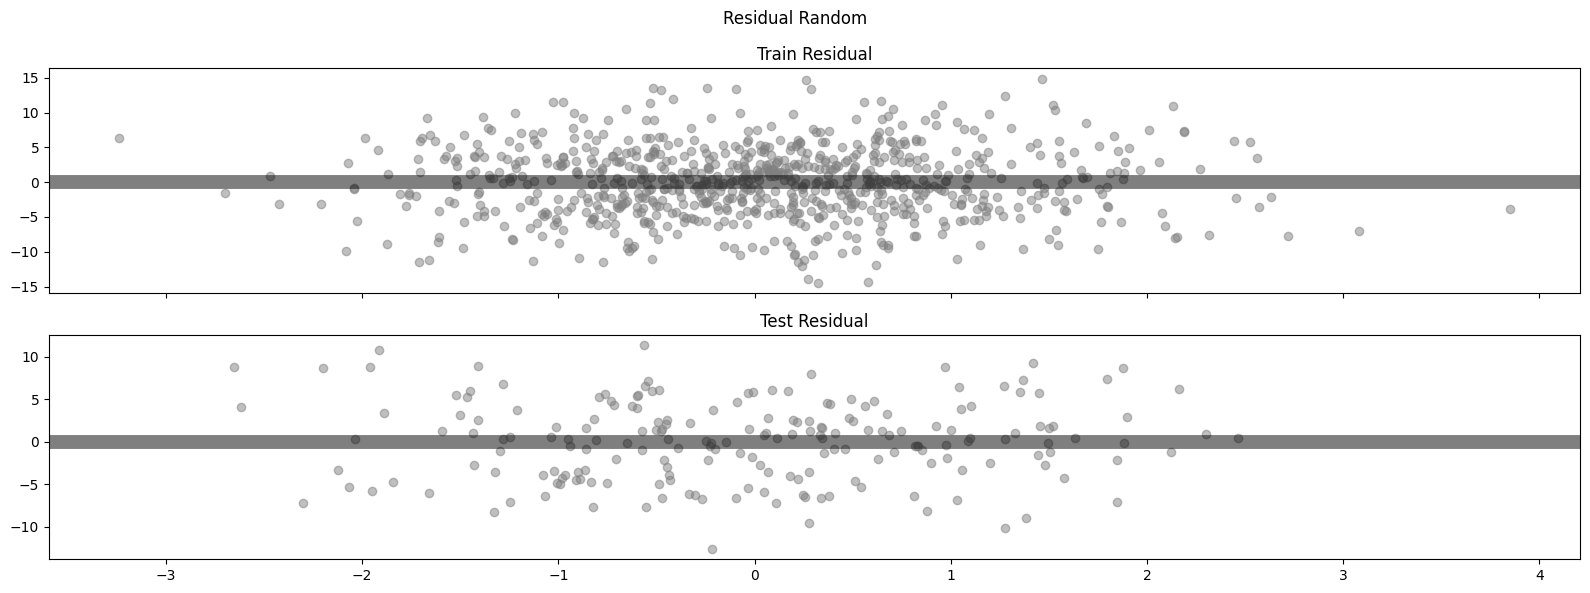

In [132]:
fig, axes = plt.subplots(2, 1, figsize=(16, 6), sharex=True)

ax = axes[0]
train_res = y_train - lr.predict(X_train)
ax.scatter(y_train, train_res, color='gray', alpha=0.5)
ax.axhline(0, linewidth=10, alpha=0.5, color='black')
ax.set_title('Train Residual')

ax = axes[1]
test_res = y_test - lr.predict(X_test)
ax.scatter(y_train, test_res, color='gray', alpha=0.5)
ax.axhline(0, linewidth=10, alpha=0.5, color='black')
ax.set_title('Test Residual')
fig.suptitle('Residual Random')
plt.tight_layout()
plt.show()

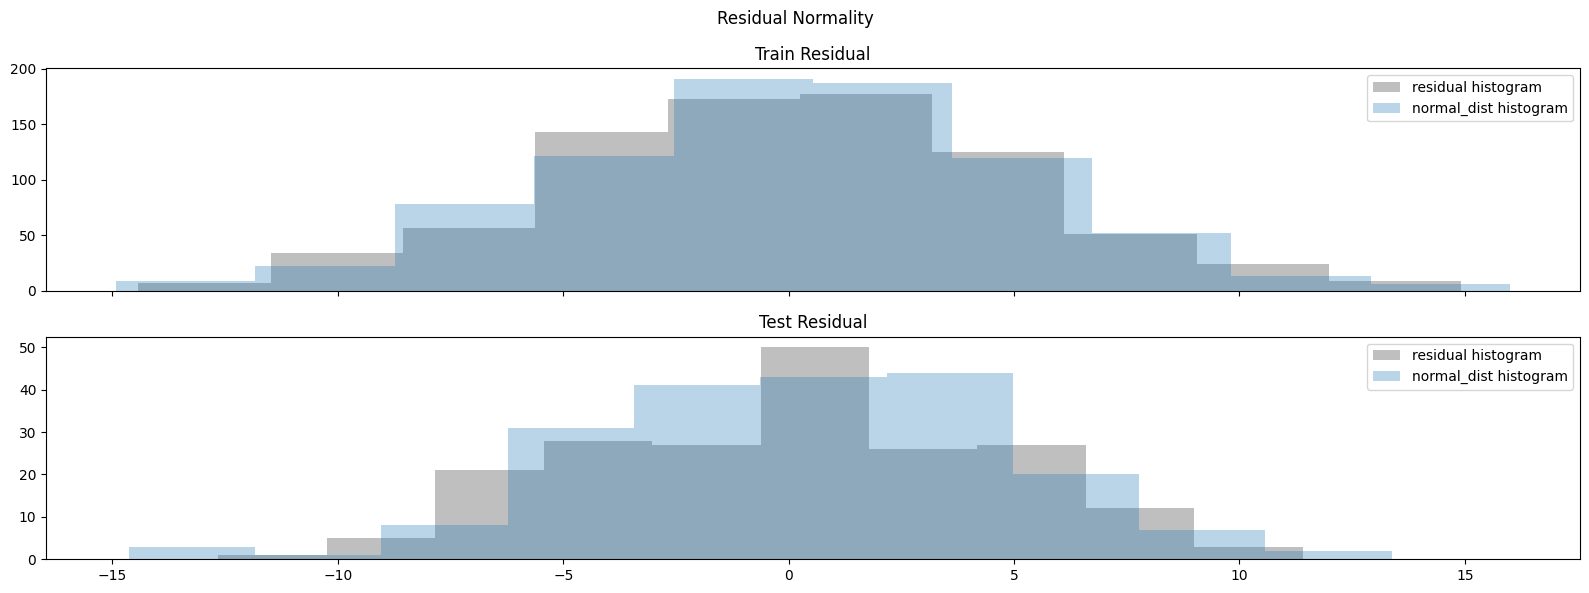

In [131]:
fig, axes = plt.subplots(2, 1, figsize=(16, 6), sharex=True)

ax = axes[0]
train_res = y_train - lr.predict(X_train)
_mean = train_res.mean()
_std = train_res.std()
_X = np.linspace(min(train_res), max(train_res), 100)
ax.hist(train_res, color='gray', alpha=0.5, label='residual histogram')
ax.hist(np.random.normal(loc=_mean, scale=_std, size=len(train_res)), alpha=0.3, label='normal_dist histogram')
ax.legend()
ax.set_title('Train Residual')

ax = axes[1]
test_res = y_test - lr.predict(X_test)
_mean = test_res.mean()
_std = test_res.std()
_X = np.linspace(min(test_res), max(test_res), 100)
ax.hist(test_res, color='gray', alpha=0.5, label='residual histogram')
ax.hist(np.random.normal(loc=_mean, scale=_std, size=len(test_res)), alpha=0.3, label='normal_dist histogram')
ax.legend()
ax.set_title('Test Residual')

fig.suptitle('Residual Normality')
plt.tight_layout()
plt.show()